In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Para trabajar con los datos utilizaremos la biblioteca `pandas` de python

In [2]:
df = pd.read_csv('data_extendida.csv')

In [3]:
df

,Unnamed: 0,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,hair_color
0,0,Academic,A,Male,Less Interested,Urban,56,6950000,83.000000,84.090000,False,True,blonde
1,1,Academic,A,Male,Less Interested,Urban,57,4410000,76.800000,86.910000,False,True,red
2,2,Academic,B,Female,Very Interested,Urban,50,6500000,80.600000,87.430000,False,True,black
3,3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.200000,82.120000,True,True,red
4,4,Academic,A,Female,Very Interested,Urban,57,5250000,75.100000,86.790000,False,False,blonde
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2495,Academic,B,Female,Very Interested,Rural,52,5840000,85.286002,90.262433,True,True,brown
2496,2496,Vocational,A,Female,Very Interested,Urban,52,6027981,87.859372,87.562161,True,True,black
2497,2497,Academic,A,Male,Very Interested,Urban,51,6335592,70.603110,85.089050,True,True,black
2498,2498,Academic,A,Female,Uncertain,Rural,54,6240868,72.594520,87.846039,True,True,black


# Entrenando un Árbol

¿Cómo podemos transformar variables categoricas a numéricas?
`get_dummies` transforma estas categorias en nuevos atributos, y codifica las codifica con 1 y 0. Veamos un ejemplo en el codigo

In [4]:
df2 = pd.get_dummies(df)
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [22]:
df.head()

,Unnamed: 0,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,hair_color
0,0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True,blonde
1,1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True,red
2,2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True,black
3,3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True,red
4,4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False,blonde


In [21]:
df2.head()

,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,type_school_Academic,type_school_Vocational,school_accreditation_A,school_accreditation_B,...,interest_Less Interested,interest_Not Interested,interest_Uncertain,interest_Very Interested,residence_Rural,residence_Urban,hair_color_black,hair_color_blonde,hair_color_brown,hair_color_red
0,56,6950000,83.0,84.09,False,True,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,57,4410000,76.8,86.91,False,True,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
2,50,6500000,80.6,87.43,False,True,1,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,49,6600000,78.2,82.12,True,True,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
4,57,5250000,75.1,86.79,False,False,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0


La biblioteca `scikit-learn` tiene varios modelos de Machine Learning. Importamos los árboles de decisión y separamos la base de datos en *features* y *labels*.

In [5]:
from sklearn import tree
y = df2['will_go_to_college']
X = df2. loc[:, df2. columns != "will_go_to_college"]


Separamos en en datos de entrenamiento y testeo.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

Entrenamos el árbol.

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
clf = clf.fit(X_train, y_train)

Con `matplotlib` podemos visualizar el árbol de decisión.

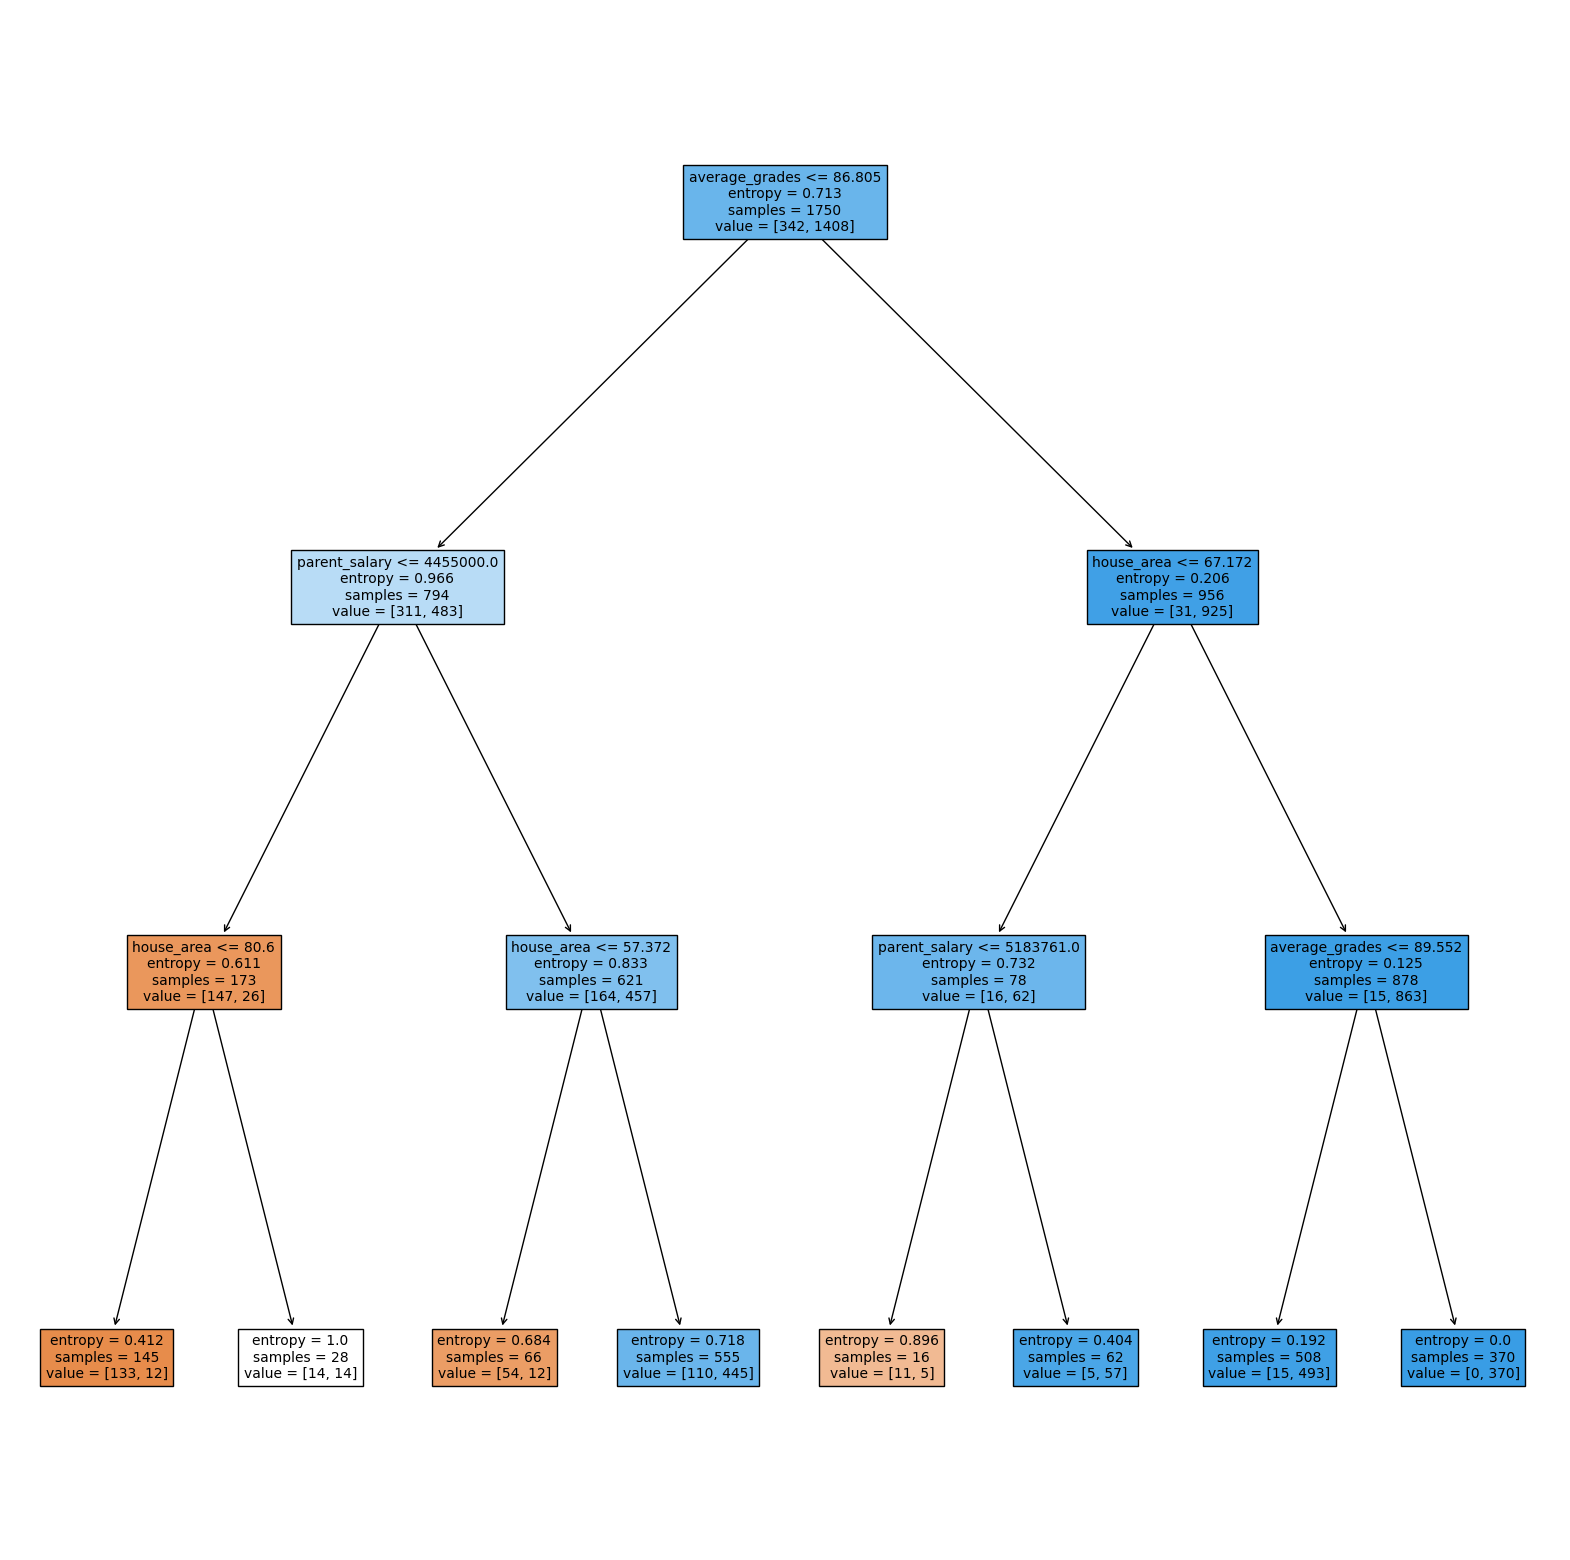

In [6]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf, fontsize=10, filled=True, feature_names=X.columns)
plt.show()

Una métrica muy importante para conocer el rendimiento del modelo es la accuracy.

In [7]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8773333333333333


Entrenamos un árbol con mayor profundidad.

In [8]:
clf2 = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy')
clf2 = clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy_score(y_test, y_pred)

0.9026666666666666

Entrenamos un árbol utilizando `gini` en vez de `entropy`

In [9]:
clf3 = tree.DecisionTreeClassifier(max_depth=5, criterion='gini')
clf3 = clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

Otras métricas importantes.

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Accuracy: 0.904
Precision: 0.9166666666666666
Recall: 0.9662162162162162
F1: 0.9407894736842106


# Overfitting

Para visualizar el *overfitting*, crearemos varios árboles con distintas profundidades y revisaremos su rendimiento en el set de entrenamiento y de testeo.

>1, train: 0.796, test: 0.836
>2, train: 0.867, test: 0.872
>3, train: 0.893, test: 0.880
>4, train: 0.898, test: 0.888
>5, train: 0.920, test: 0.900
>6, train: 0.941, test: 0.912
>7, train: 0.961, test: 0.924
>8, train: 0.971, test: 0.928
>9, train: 0.981, test: 0.928
>10, train: 0.991, test: 0.916
>11, train: 0.996, test: 0.932
>12, train: 0.998, test: 0.924
>13, train: 0.999, test: 0.924
>14, train: 1.000, test: 0.924
>15, train: 1.000, test: 0.920
>16, train: 1.000, test: 0.920
>17, train: 1.000, test: 0.928
>18, train: 1.000, test: 0.932
>19, train: 1.000, test: 0.924


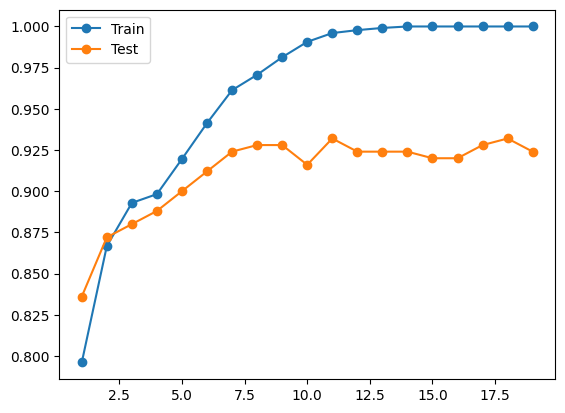

In [12]:
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
#listas de métricas para cada profundidad
train_scores, test_scores = list(), list()

values = [i for i in range(1, 20)]
for i in values:
 model = DecisionTreeClassifier(max_depth=i, criterion='entropy')
 model.fit(X_train, y_train)
 # evaluamos en el dataset de entrenamiento
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluamos en el dataset de testeo
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)

 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

# graficamos los valores obtenidos
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

Una manera de reducir el overfitting es podar nodos del árbol. Para esto, revisamos si uno de los hijos de un nodo contiene muy pocos datos.

In [33]:
# creamos el árbol con una gran profundidad, lo entrenamos y vemos su rendimiento.
model = DecisionTreeClassifier(max_depth=20, criterion='entropy')
model.fit(X_train, y_train)
test_y = model.predict(X_test)
test_acc = accuracy_score(y_test, test_y)
print(test_acc)

0.908


Ahora, definimos una función para recorrer el árbol, nodo por nodo, y podamos.

In [34]:
from sklearn.tree._tree import TREE_LEAF

def prune_tree(head, index, min_samples):
    # Si el nodo tiene pocos datos en alguno de sus hijos, lo convertimos en una hoja (hacemos la poda).
    if head.value[index].min() < min_samples:
        head.children_left[index] = TREE_LEAF
        head.children_right[index] = TREE_LEAF
    # De lo contrario, y si tiene hijos, los visitamos recursivamente (el árbol es completo).
    if head.children_left[index] != TREE_LEAF:
        prune_tree(head, head.children_left[index], min_samples)
        prune_tree(head, head.children_right[index], min_samples)

print(sum(model.tree_.children_left < 0))
# Utilizaremos 5 datos como nuestro mínimo para hacer la poda.
prune_tree(model.tree_, 0, 5)
print(sum(model.tree_.children_left < 0))

146
182


Vemos que ahora tenemos más hojas que antes. Revisemos que efectivamente hemos reducido el overfitting.

In [35]:
test_y_prune = model.predict(X_test)
test_acc = accuracy_score(y_test, test_y_prune)
print(test_acc)

0.916


Vemos que tenemos más hojas que antes ya que convertimos los nodos con un bajo número de datos en alguno de sus hijos en hojas. Además, mejora el accuracy.

# Random Forest

Importamos el *random forest* y lo entrenamos.

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(criterion='entropy')
rfc = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(f"Accuracy Bosque: {accuracy_score(y_test, y_pred)}")

Accuracy Bosque: 0.936


Ahora, entrenamos un árbol y comparamos su rendimiento con el del bosque.

In [37]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy Arbol: {accuracy_score(y_test, y_pred)}")

Accuracy Arbol: 0.896


Usaremos el mismo codigo para ver el *overfitting* del árbol para ver en el caso del bosque.

>1, train: 0.802, test: 0.784
>2, train: 0.835, test: 0.820
>3, train: 0.869, test: 0.868
>4, train: 0.895, test: 0.880
>5, train: 0.924, test: 0.896
>6, train: 0.940, test: 0.904
>7, train: 0.957, test: 0.916
>8, train: 0.969, test: 0.924
>9, train: 0.981, test: 0.944
>10, train: 0.990, test: 0.952
>11, train: 0.995, test: 0.948
>12, train: 0.997, test: 0.932
>13, train: 1.000, test: 0.960
>14, train: 1.000, test: 0.948
>15, train: 1.000, test: 0.952
>16, train: 1.000, test: 0.952
>17, train: 1.000, test: 0.952
>18, train: 1.000, test: 0.964
>19, train: 1.000, test: 0.952


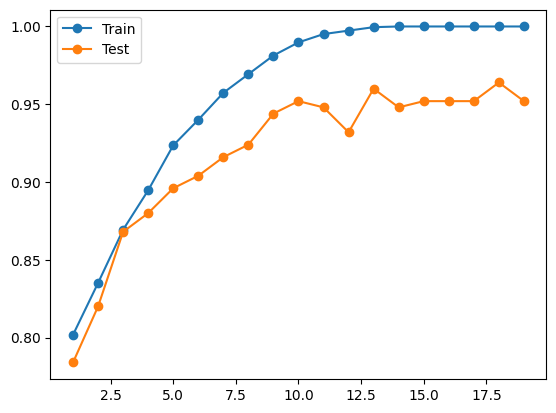

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
train_scores, test_scores = list(), list()
values = [i for i in range(1, 20)]
for i in values:
 model = RandomForestClassifier(max_depth=i, criterion='entropy')
 model.fit(X_train, y_train)

 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)

 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

Notamos que el Bosque tiene menor overfitting que el árbol, pero igual tiene.